# Contest

ClassiFicon Hackathon 2021 by **I’mbesideyou Inc.**

Face Expression Detection

### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as pimg
import cv2
import os
from zipfile import ZipFile

# Importing Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras import layers

Connecting Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/Contest

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Contest


### Importing Dataset

In [ ]:
X_Train = np.load("XTrainFeatures.npy")
X_Valid = np.load("XValidFeatures.npy")

y_Train = np.load("yTrain.npy")
y_Valid = np.load("yValid.npy")

In [ ]:
y_Train.shape

(4831, 3)

### Data Seperation



In [ ]:
def DataSeperation(X,y):
    X1,y1 = [],[]
    X2,y2 = [],[]
 
    for i in range(X.shape[0]):
        if np.all(y[i] == [1,0,0]):
            # Not Smile
            X1.append(X[i])
            y1.append(0)
        elif np.all(y[i] == [0,1,0]):
            # Postive Smile
            X1.append(X[i])
            y1.append(1)
            X2.append(X[i])
            y2.append(1)
        else:
            # Negetive Smile
            X2.append(X[i])
            y2.append(0)
 
    return np.array(X1),np.array(y1),np.array(X2),np.array(y2)
 
X1_Train,y1_Train,X2_Train,y2_Train = DataSeperation(X_Train,y_Train)
X1_Valid,y1_Valid,X2_Valid,y2_Valid = DataSeperation(X_Valid,y_Valid)

### Model for Task-1

Feature Classfication Module

In [ ]:
tf.keras.backend.clear_session()

In = tf.keras.Input(shape=(100,150,3))
x = tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),activation='relu',padding='valid')(In)
x = tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),activation='relu',padding='valid')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(5,5))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512,activation='relu')(x)
Ou = tf.keras.layers.Dense(32,activation='relu')(x)

FeatureClassifier1 = tf.keras.Model(In, Ou)
FeatureClassifier1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 148, 16)       448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 146, 32)       4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 19, 29, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 17632)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               9028096   
_________________________________________________________________
dense_1 (Dense)              (None, 32)                16416 

Image Classfication

In [ ]:
Inp = tf.keras.Input(shape=(8,100,150,3))
for i in range(8):
    if i == 0:
        x = FeatureClassifier1(Inp[:,i,:,:,:])
    else:
        x = tf.keras.layers.Concatenate()([x,FeatureClassifier1(Inp[:,i,:,:,:])])
x = tf.keras.layers.Dropout(0.1)(x)
Out = tf.keras.layers.Dense(1,activation='sigmoid')(x)

Classifier1 = tf.keras.Model(Inp, Out)
Classifier1.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8, 100, 150, 0                                            
__________________________________________________________________________________________________
tf.__operators__.getitem (Slici (None, 100, 150, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
tf.__operators__.getitem_1 (Sli (None, 100, 150, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
model (Functional)              (None, 32)           9049600     tf.__operators__.getitem[0][0]   
                                                                 tf.__operators__.getitem_1[

Loss and Optimizer

In [ ]:
Classifier1.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

Training

In [ ]:
Classifier1.fit(X1_Train,y1_Train,batch_size=16,epochs=15,
               validation_data=(X1_Valid,y1_Valid),shuffle=True)

Epoch 1/15
272/272 [==============================] - 42s 39ms/step - loss: 7.1790 - accuracy: 0.7572 - val_loss: 0.5107 - val_accuracy: 0.8093
Epoch 2/15
272/272 [==============================] - 10s 37ms/step - loss: 0.4588 - accuracy: 0.8190 - val_loss: 0.4605 - val_accuracy: 0.8208
Epoch 3/15
272/272 [==============================] - 10s 37ms/step - loss: 0.3756 - accuracy: 0.8504 - val_loss: 0.4749 - val_accuracy: 0.8283
Epoch 4/15
272/272 [==============================] - 10s 37ms/step - loss: 0.3507 - accuracy: 0.8547 - val_loss: 0.4536 - val_accuracy: 0.8208
Epoch 5/15
272/272 [==============================] - 10s 37ms/step - loss: 0.3247 - accuracy: 0.8523 - val_loss: 0.4718 - val_accuracy: 0.8304
Epoch 6/15
272/272 [==============================] - 10s 37ms/step - loss: 0.3048 - accuracy: 0.8594 - val_loss: 0.5132 - val_accuracy: 0.8338
Epoch 7/15
272/272 [==============================] - 10s 37ms/step - loss: 0.2454 - accuracy: 0.8795 - val_loss: 0.6330 - val_accuracy:

In [ ]:
Classifier1.save("Task-1.h5")

### Model for Task-2

Feature Classfication Module

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 148, 16)       448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 37, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14208)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               3637504   
_________________________________________________________________
dense_1 (Dense)              (None, 16)                4112      
Total params: 3,642,064
Trainable params: 3,642,064
Non-trainable params: 0
___________________________________________________

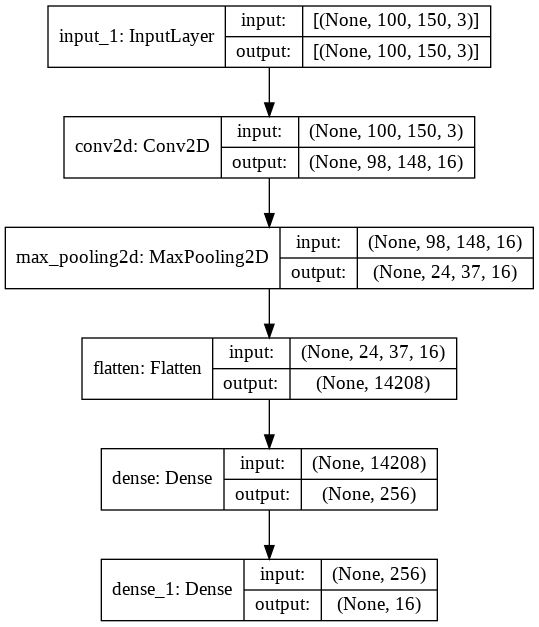

In [ ]:
tf.keras.backend.clear_session()

In = tf.keras.Input(shape=(100,150,3))
x = tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),activation='relu',padding='valid')(In)
x = tf.keras.layers.MaxPooling2D(pool_size=(4,4))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256,activation='relu')(x)
Ou = tf.keras.layers.Dense(16,activation='relu')(x)

FeatureClassifier2 = tf.keras.Model(In, Ou)
FeatureClassifier2.summary()
tf.keras.utils.plot_model(FeatureClassifier2,show_shapes=True)

Image Classfication

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 8, 100, 150, 0                                            
__________________________________________________________________________________________________
tf.__operators__.getitem_8 (Sli (None, 100, 150, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
tf.__operators__.getitem_9 (Sli (None, 100, 150, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
model (Functional)              (None, 16)           3642064     tf.__operators__.getitem_8[0][0] 
                                                                 tf.__operators__.getitem_9[

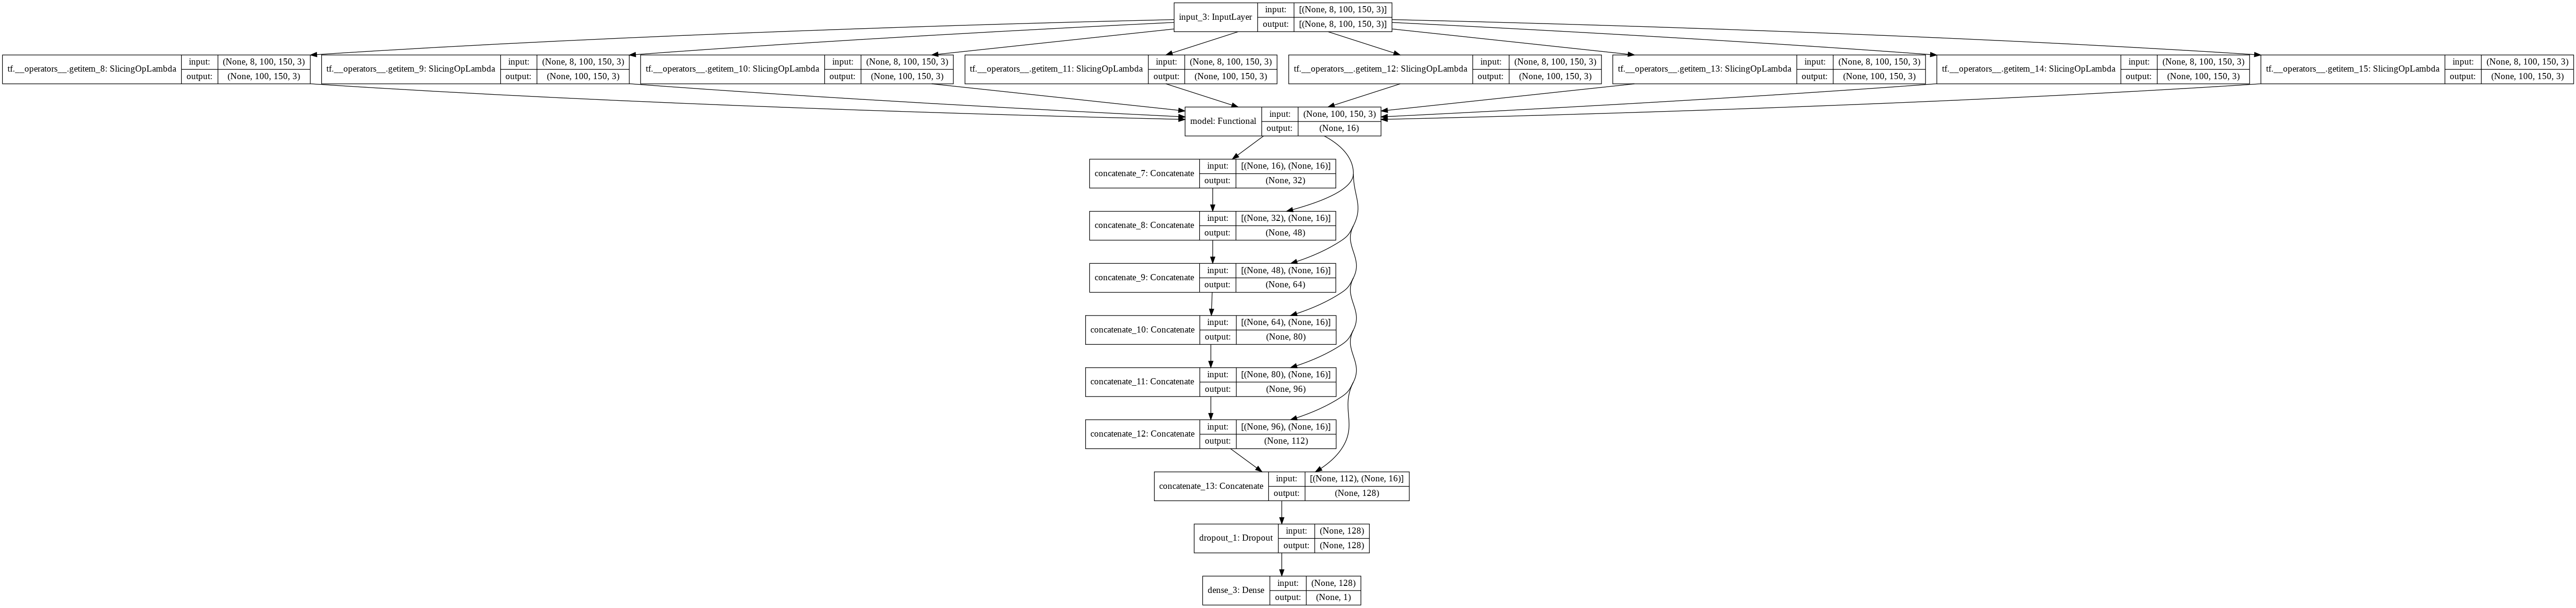

In [ ]:
Inp = tf.keras.Input(shape=(8,100,150,3))
for i in range(8):
    if i == 0:
        x = FeatureClassifier2(Inp[:,i,:,:,:])
    else:
        x = tf.keras.layers.Concatenate()([x,FeatureClassifier2(Inp[:,i,:,:,:])])
x = tf.keras.layers.Dropout(0.2)(x)
Out = tf.keras.layers.Dense(1,activation='sigmoid')(x)

Classifier2 = tf.keras.Model(Inp, Out)
Classifier2.summary()
tf.keras.utils.plot_model(Classifier2,show_shapes=True)

Loss and Optimizer

In [ ]:
Classifier2.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

Training

In [ ]:
History = Classifier2.fit(X2_Train,y2_Train,batch_size=4,epochs=10,
               validation_data=(X2_Valid,y2_Valid),shuffle=True)

Epoch 1/10
369/369 [==============================] - 5s 11ms/step - loss: 16.3599 - accuracy: 0.6424 - val_loss: 0.6612 - val_accuracy: 0.7039
Epoch 2/10
369/369 [==============================] - 4s 10ms/step - loss: 0.6645 - accuracy: 0.6589 - val_loss: 0.6403 - val_accuracy: 0.7039
Epoch 3/10
369/369 [==============================] - 4s 10ms/step - loss: 0.6447 - accuracy: 0.6815 - val_loss: 0.6282 - val_accuracy: 0.7039
Epoch 4/10
369/369 [==============================] - 4s 10ms/step - loss: 0.6381 - accuracy: 0.6785 - val_loss: 0.6216 - val_accuracy: 0.7039
Epoch 5/10
369/369 [==============================] - 4s 10ms/step - loss: 0.6290 - accuracy: 0.6870 - val_loss: 0.6173 - val_accuracy: 0.7039
Epoch 6/10
369/369 [==============================] - 4s 10ms/step - loss: 0.6470 - accuracy: 0.6511 - val_loss: 0.6147 - val_accuracy: 0.7039
Epoch 7/10
369/369 [==============================] - 4s 10ms/step - loss: 0.6360 - accuracy: 0.6687 - val_loss: 0.6132 - val_accuracy: 0.703

In [ ]:
Classifier2.save("Task-2.h5")

In [ ]:
Results = History.history
Results.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

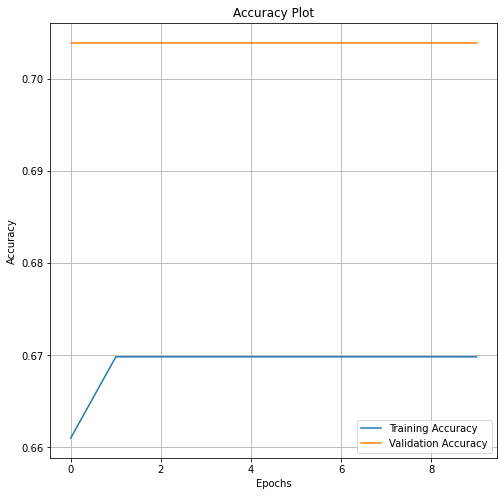

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(Results['accuracy'], label='Training Accuracy')
plt.plot(Results['val_accuracy'], label='Validation Accuracy')
plt.grid()
plt.title("Accuracy Plot")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

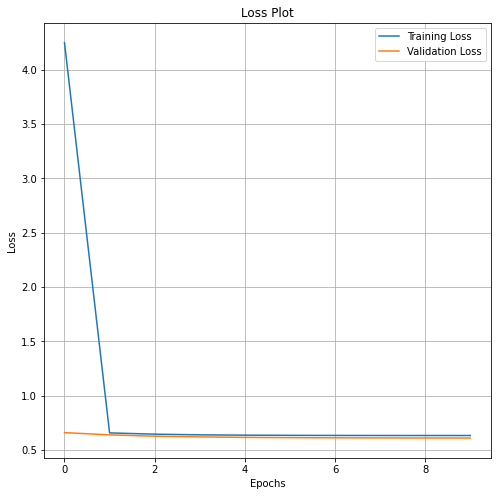

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(Results['loss'], label='Training Loss')
plt.plot(Results['val_loss'], label='Validation Loss')
plt.grid()
plt.title("Loss Plot")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
np.unique(y2_Train,return_counts=True)

(array([0, 1]), array([487, 988]))

In [ ]:
from PIL import Image
from matplotlib import cm

In [ ]:
X = np.load("XTrain.npy")

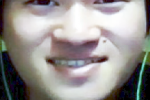

In [ ]:
PIL_image = Image.fromarray(np.uint8(X_Train[1][7])).convert('RGB')
PIL_image